# HW4, Myunghee Lee (USC ID: 2446752777)

In [1]:
# function for making training data set
def mtrain(frame):
    train = frame.iloc[:1495,:]
        
    X = train.iloc[:,:-1]
    y = train.iloc[:, -1]
    
    return X, y

# function for making test data set
def mtest(frame):
    test = frame.iloc[1495:,:]
    
    X = test.iloc[:,:-1]
    y = test.iloc[:, -1]
   
    return X, y

In [2]:
import pandas as pd

df1 = pd.read_csv("communities.data", header = None)

# extracting columns' names
file="communities.names"

lines= open(file, 'r').readlines()
dic = dict()
i=0

for line in lines:
    if line.startswith('@attribute'):
        dic[i] = line.split(' ')[1]
        i +=1
df1=df1.rename(columns = dic)
print(df1)

      state county community           communityname  fold  population  \
0         8      ?         ?            Lakewoodcity     1        0.19   
1        53      ?         ?             Tukwilacity     1        0.00   
2        24      ?         ?            Aberdeentown     1        0.00   
3        34      5     81440     Willingborotownship     1        0.04   
4        42     95      6096       Bethlehemtownship     1        0.01   
5         6      ?         ?       SouthPasadenacity     1        0.02   
6        44      7     41500             Lincolntown     1        0.01   
7         6      ?         ?               Selmacity     1        0.01   
8        21      ?         ?           Hendersoncity     1        0.03   
9        29      ?         ?             Claytoncity     1        0.01   
10        6      ?         ?            DalyCitycity     1        0.13   
11       36      ?         ?  RockvilleCentrevillage     1        0.02   
12       25     21     44105          

In [3]:
# removing 5 non-predictive columns
df1=df1.drop(["state", "county", "community", "communityname", "fold"], axis=1)

In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

# replacing missing values with median 
imp = SimpleImputer(strategy='median')  
df1_imt = df1.replace('?', np.nan)
df1_imt = imp.fit_transform(df1_imt)

df1_imt= pd.DataFrame(df1_imt, columns=list(df1))
print(df1_imt)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
5           0.02           0.28          0.06          0.54          1.00   
6           0.01           0.39          0.00          0.98          0.06   
7           0.01           0.74          0.03          0.46          0.20   
8           0.03           0.34          0.20          0.84          0.02   
9           0.01           0.40          0.06          0.87          0.30   
10          0.13           0.71          0.15          0.07          1.00   
11          0.02           0.46          0.08          0.91          0.07   

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

X, y = mtrain(df1_imt) # making training data

# getting a correlation matrix of training data
corr = X.corr()  
print(corr)

                      population  householdsize  racepctblack  racePctWhite  \
population              1.000000      -0.040404      0.242144     -0.306023   
householdsize          -0.040404       1.000000     -0.068374     -0.243565   
racepctblack            0.242144      -0.068374      1.000000     -0.793431   
racePctWhite           -0.306023      -0.243565     -0.793431      1.000000   
racePctAsian            0.168868       0.209848     -0.104912     -0.270829   
racePctHisp             0.162282       0.473320     -0.069449     -0.436737   
agePct12t21             0.014554       0.517742      0.118272     -0.189135   
agePct12t29             0.128721       0.371658      0.143406     -0.258390   
agePct16t24             0.075744       0.301949      0.125330     -0.175195   
agePct65up             -0.107060      -0.606714      0.056381      0.138619   
numbUrban               0.993613      -0.041553      0.234451     -0.301945   
pctUrban                0.239205      -0.021469     

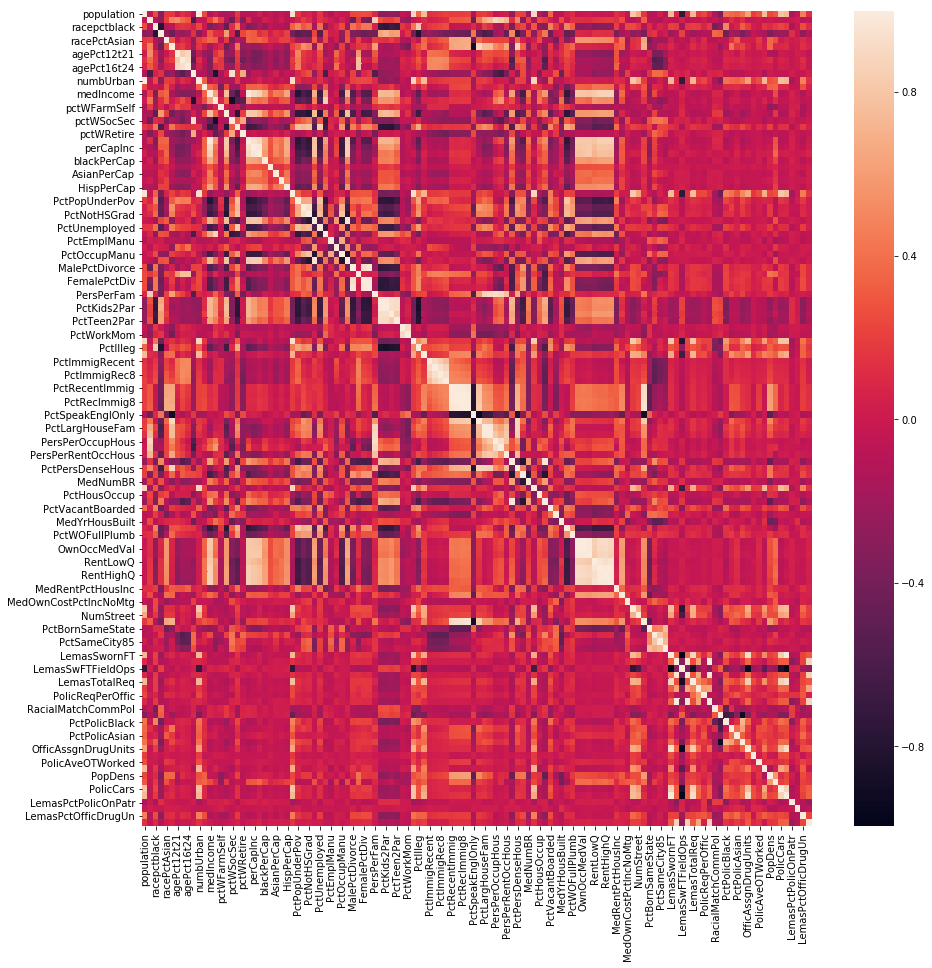

In [6]:
# plotting the correlation matrix as heatmap
plt.subplots(figsize=(15,15))
sns.heatmap(corr)

In [7]:
import statistics
CV_lst=[]
for i in range(len(X.columns)):
    s = np.std(X.iloc[:,i])
    m = statistics.mean(X.iloc[:,i])    
    cv = s/m
    CV_lst.append(cv)

CV = pd.DataFrame(CV_lst, index = list(X), columns=['CV'])
print(CV)

                            CV
population            2.240355
householdsize         0.355681
racepctblack          1.428407
racePctWhite          0.330102
racePctAsian          1.358645
racePctHisp           1.611552
agePct12t21           0.368960
agePct12t29           0.291217
agePct16t24           0.500143
agePct65up            0.412638
numbUrban             2.037780
pctUrban              0.643103
medIncome             0.591780
pctWWage              0.328504
pctWFarmSelf          0.701663
pctWInvInc            0.365212
pctWSocSec            0.360595
pctWPubAsst           0.705970
pctWRetire            0.345305
medFamInc             0.540489
perCapInc             0.557893
whitePerCap           0.519655
blackPerCap           0.599140
indianPerCap          0.818094
AsianPerCap           0.614660
OtherPerCap           0.673054
HispPerCap            0.483906
NumUnderPov           2.341660
PctPopUnderPov        0.754218
PctLess9thGrade       0.680263
...                        ...
PctBornS

In [8]:
import math

N = math.floor(math.sqrt(128))

# sorting by standard deviation 
CV = CV.sort_values(by=['CV'], ascending = False)
CV_selected = CV.iloc[:N,0]

# N(floor(sqrt(128))) features with highest CV
print (CV_selected) 

PctPolicAsian          5.525210
NumStreet              4.291487
NumInShelters          3.469791
NumIlleg               3.057941
NumImmig               2.925656
LemasPctOfficDrugUn    2.552092
NumUnderPov            2.341660
LemasSwornFT           2.247290
population             2.240355
numbUrban              2.037780
HousVacant             1.967809
Name: CV, dtype: float64


In [9]:
lst = list(CV_selected.index)  # selected features' names

# making a data frame with selected features
sf =  None
for feature in lst:
    sf = pd.concat([sf, X.loc[:,feature]], axis=1)

print(sf)

      PctPolicAsian  NumStreet  NumInShelters  NumIlleg  NumImmig  \
0              0.10       0.00           0.04      0.04      0.03   
1              0.00       0.00           0.00      0.00      0.01   
2              0.00       0.00           0.00      0.01      0.00   
3              0.00       0.00           0.00      0.03      0.02   
4              0.00       0.00           0.00      0.00      0.00   
5              0.00       0.00           0.00      0.00      0.04   
6              0.00       0.00           0.00      0.00      0.01   
7              0.00       0.00           0.00      0.02      0.02   
8              0.00       0.00           0.01      0.02      0.00   
9              0.00       0.00           0.00      0.00      0.01   
10             0.00       0.14           0.07      0.05      0.28   
11             0.00       0.00           0.01      0.01      0.01   
12             0.00       0.00           0.00      0.00      0.01   
13             0.00       0.00    

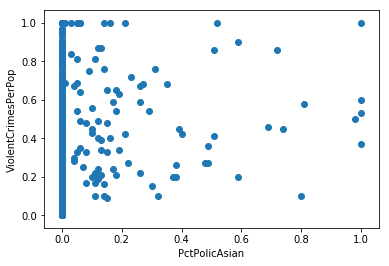

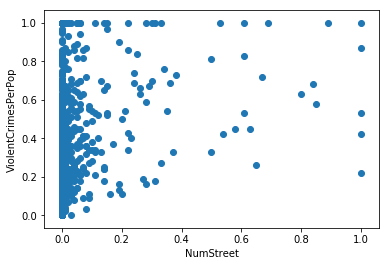

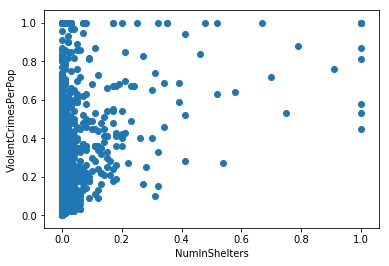

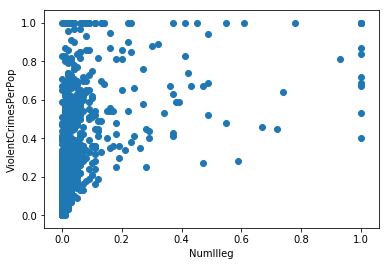

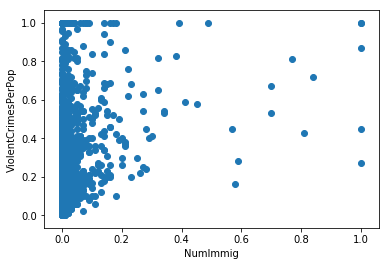

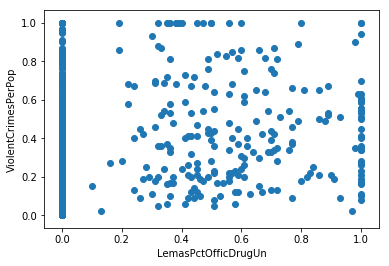

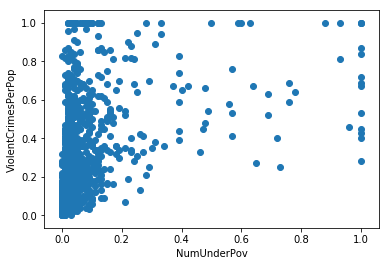

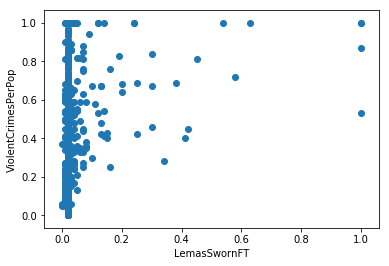

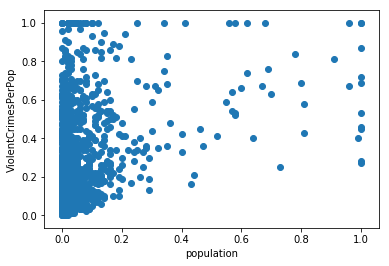

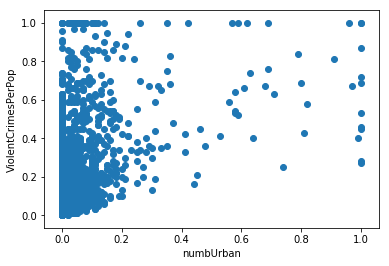

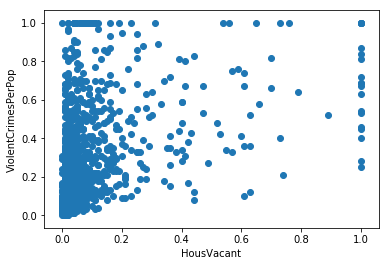

In [10]:
# scatter plots of each feature and ViolentCrimesPerPop
for i in range(len(sf.columns)):
    plt.scatter(sf.iloc[:,i], y.iloc[:])
    plt.xlabel(sf.iloc[0].index[i])
    plt.ylabel(df1_imt.iloc[0].index[-1])
    plt.show()

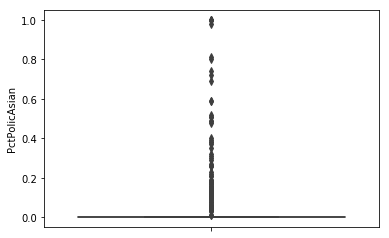

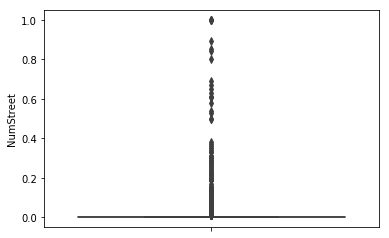

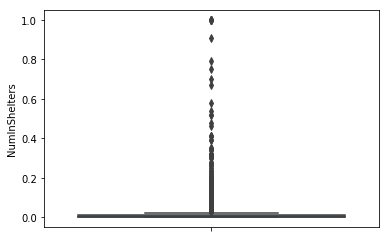

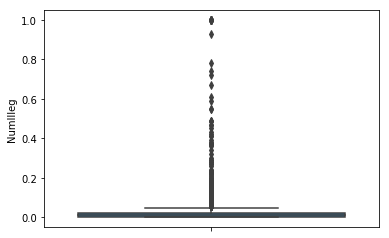

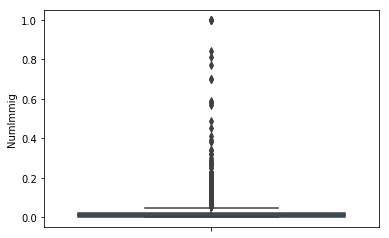

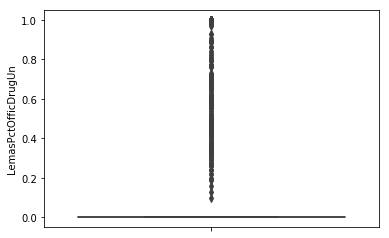

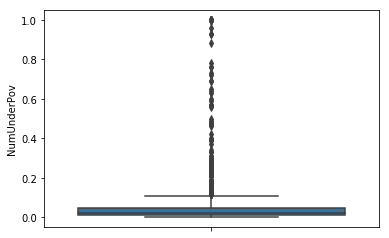

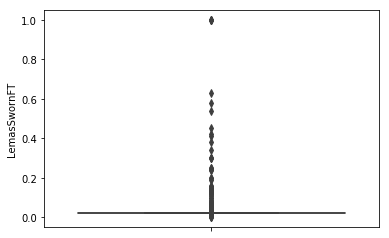

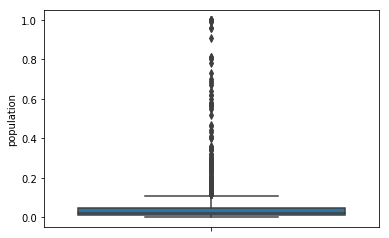

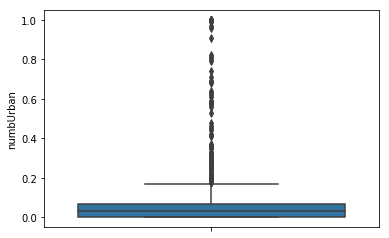

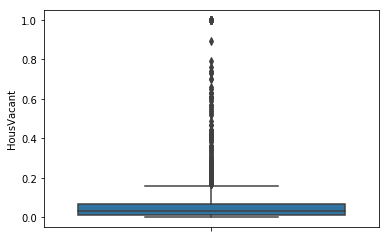

In [11]:
# box plots of each feature
for i in range(len(sf.columns)):
    sns.boxplot(x=None, y=sf.iloc[:,i])
    plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

# feature selection by RFECV
model_LR = LinearRegression()
best = RFECV(model_LR, cv=10).fit(X, y) 

In [13]:
mask = best.support_   # The mask of selected features with the best CV score
lst =[]
for i in range(len(mask)):
    if mask[i] == True:
        lst.append(i)
print(lst)  # columns' numbers of the selected features

[2, 6, 7, 8, 12, 13, 15, 16, 18, 19, 21, 28, 33, 38, 39, 40, 41, 44, 47, 48, 49, 50, 51, 61, 63, 64, 66, 67, 68, 69, 71, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 99, 100, 102, 104, 107, 110, 113, 116, 117, 121]


In [14]:
# making train_X with selected features
train_X = None
for i in lst:
    train_X = pd.concat([train_X, X.iloc[:,i]], axis=1)

print(train_X)

      racepctblack  agePct12t21  agePct12t29  agePct16t24  medIncome  \
0             0.02         0.34         0.47         0.29       0.37   
1             0.12         0.26         0.59         0.35       0.31   
2             0.49         0.39         0.47         0.28       0.30   
3             1.00         0.51         0.50         0.34       0.58   
4             0.02         0.38         0.38         0.23       0.50   
5             0.06         0.31         0.48         0.27       0.52   
6             0.00         0.30         0.37         0.23       0.42   
7             0.03         0.52         0.55         0.36       0.16   
8             0.20         0.38         0.45         0.28       0.17   
9             0.06         0.90         0.82         0.80       0.54   
10            0.15         0.40         0.52         0.35       0.49   
11            0.08         0.34         0.36         0.22       0.72   
12            0.01         0.29         0.32         0.20       

In [15]:
model_LR.fit(train_X, y)

print(model_LR.intercept_, model_LR.coef_) # coefficients from LinearRegression()

0.431648379389995 [ 0.24462075  0.16361011 -0.35081241 -0.0975778  -0.23958671 -0.19424316
 -0.164659    0.11806755 -0.10968781  0.325704   -0.07446737 -0.13139325
  0.27701279  0.37058467  0.23477573  0.1376419  -0.46321424 -0.27955357
  0.07362439 -0.23194589 -0.28470899  0.09114803 -0.18553968 -0.18014028
 -0.16136283  0.36813741 -0.23117173 -0.72906999  0.29140772  0.08780709
  0.2340168   0.63280044  0.09599706 -0.08248983 -0.38087355  0.45144835
 -0.17566919 -0.16831567 -0.13215383 -0.11094213  0.4516247   0.07518192
 -0.10282714  0.09870957  0.1703253   0.14063357  0.25860587 -0.29367782
  0.20281328 -0.0600186   0.08342305 -0.28387022  0.05575138  0.0840115
  0.47283487 -0.17290633]


In [16]:
import statsmodels.api as sm

x = sm.add_constant(train_X) # adding '1' to estimate b0

Lreg = sm.OLS(y, x).fit() # linear regression 
Lreg.summary()

C:\Users\Myunghee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.699
Model:                             OLS   Adj. R-squared:                  0.688
Method:                  Least Squares   F-statistic:                     59.70
Date:                 Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                         23:42:56   Log-Likelihood:                 925.23
No. Observations:                 1495   AIC:                            -1736.
Df Residuals:                     1438   BIC:                            -1434.
Df Model:                           56                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4316      0.175      2.469      0.014       0.089       0.775
racepctblack              0.2446      0.037      6.625      0.000       0.172       0.317
agePct12t21               0.1636      0.112      1.458      0.145      -0.056       0.384
agePct12t29              -0.3508      0.157     -2.236      0.025      -0.659      -0.043
agePct16t24              -0.0976      0.171     -0.571      0.568      -0.433       0.237
medIncome                -0.2396      0.189     -1.271      0.204      -0.609       0.130
pctWWage                 -0.1942      0.092     -2.112      0.035      -0.375      -0.014
pctWInvInc               -0.1647      0.070     -2.359      0.018      -0.302      -0.028
pctWSocSec                0.1181      0.086      1.373      0.170      -0.051       0.287
pctWRetire               -0.1097      0.038     -2.883      0.004      -0.184      -0.035
medFamInc                 0.3257      0.166      1.958      0.050      -0.001       0.652
whitePerCap              -0.0745      0.091     -0.817      0.414      -0.253       0.104
PctPopUnderPov           -0.1314      0.057     -2.322      0.020      -0.242      -0.020
PctEmploy                 0.2770      0.068      4.055      0.000       0.143       0.411
MalePctDivorce            0.3706      0.253      1.464      0.144      -0.126       0.867
MalePctNevMarr            0.2348      0.067      3.518      0.000       0.104       0.366
FemalePctDiv              0.1376      0.324      0.425      0.671      -0.498       0.774
TotalPctDiv              -0.4632      0.539     -0.860      0.390      -1.520       0.594
PctKids2Par              -0.2796      0.088     -3.179      0.002      -0.452      -0.107
PctWorkMomYoungKids       0.0736      0.053      1.387      0.166      -0.030       0.178
PctWorkMom               -0.2319      0.059     -3.958      0.000      -0.347      -0.117
NumIlleg                 -0.2847      0.097     -2.948      0.003      -0.474      -0.095
PctIlleg                  0.0911      0.051      1.798      0.072      -0.008       0.191
NumImmig                 -0.1855      0.086     -2.154      0.031      -0.354      -0.017
PctNotSpeakEnglWell      -0.1801      0.057     -3.153      0.002      -0.292      -0.068
PctLargHouseOccup        -0.1614      0.074     -2.171      0.030      -0.307      -0.016
PersPerOccupHous          0.3681      0.140      2.638      0.008       0.094       0.642
PersPerRentOccHous       -0.2312      0.089     -2.608      0.009      -0.405      -0.057
PctPersOwnOccup          -0.7291      0.261     -2.793      0.005      -1.241      -0.217
PctPersDenseHous          0.2914      0.075      3.891      0.000       0.145       0.438
PctHousLess3BR            0.0878      0.056      1.554      0.120      -0.023       0.199
HousVacant  

In [17]:
test_X, test_y = mtest(df1_imt) # making test data set

# making test_X with selected features
sftest_X =  None
for i in lst:
    sftest_X = pd.concat([sftest_X, test_X.iloc[:,i]], axis=1)

print(sftest_X)

      racepctblack  agePct12t21  agePct12t29  agePct16t24  medIncome  \
1495          0.03         0.15         0.19         0.09       0.73   
1496          0.13         0.48         0.53         0.30       0.40   
1497          0.04         0.84         0.78         0.75       0.08   
1498          0.07         0.38         0.47         0.27       0.47   
1499          0.20         0.38         0.62         0.35       0.58   
1500          0.02         0.37         0.26         0.20       1.00   
1501          0.03         0.45         0.50         0.30       0.39   
1502          0.22         0.39         0.50         0.33       0.23   
1503          0.01         0.22         0.23         0.13       0.27   
1504          0.20         0.28         0.43         0.26       0.29   
1505          0.35         0.39         0.46         0.31       0.23   
1506          0.52         0.34         0.43         0.29       0.11   
1507          0.04         0.49         0.51         0.41       

In [18]:
from sklearn.metrics import mean_squared_error # to get men square error (MSE)

pred = model_LR.predict(sftest_X)

# MSE of test data
mse_test1 = mean_squared_error(test_y, pred)
print("test error for linear model:", mse_test1)

test error for linear model: 0.017788481892953838


In [19]:
from sklearn.linear_model import RidgeCV

lamb = np.logspace(-10, 1, num = 400) # 10^-10 <= lamb <= 10^1, the number of lamb: 400
estm = RidgeCV(alphas=lamb, cv =10).fit(X, y)  # alphas = C^-1 = lambda

a = estm.alpha_ # best alpha (lambda)
print(a)

2.179444753752979


In [20]:
from sklearn.linear_model import Ridge
model_Ridge = Ridge(alpha=a)
model_Ridge.fit(X, y)

pred = model_Ridge.predict(test_X)
mse_test2 = mean_squared_error(test_y, pred)  # MSE of test data
print("test error for ridge:", mse_test2)

test error for ridge: 0.017524097439074696


In [21]:
from sklearn.linear_model import LassoCV

estm = LassoCV(cv=10).fit(X, y)
a = estm.alpha_   # best lambda in Lasso

print(a)

0.00010831930127505126


In [22]:
# fitting a Lasso model with best lambda (a) 
from sklearn.linear_model import Lasso
model_ls = Lasso(alpha=a)
model_ls.fit(X, y)

Lasso(alpha=0.00010831930127505126, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
# a list of the variables selected by Lasso
lst = []
for i in range(len(model_ls.coef_)):
    if model_ls.coef_[i] != 0:
        lst.append(i)

# lst: columns' numbers of selected variales (coef !=0)
print(lst)

[2, 4, 6, 7, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 28, 29, 31, 33, 34, 36, 38, 39, 40, 44, 45, 46, 48, 49, 50, 51, 55, 59, 61, 63, 64, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 82, 85, 86, 87, 88, 89, 90, 91, 94, 99, 102, 104, 106, 107, 108, 111, 112, 113, 114, 115, 116, 118, 119]


In [24]:
sv_lst = [] 

for num in lst:
    sv_lst.append(X.iloc[0].index[num])

# a list of the variables selected by the LASSO model
print(sv_lst)  

['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop', 'PolicReqPerOffic

In [25]:
pred = model_ls.predict(test_X)
mse_test3 = mean_squared_error(test_y, pred)  
print("test error for LASSO:", mse_test3)

test error for LASSO: 0.017648309023833065


In [26]:
from sklearn.preprocessing import StandardScaler

std_X = StandardScaler().fit_transform(X)
estm = LassoCV(cv=10).fit(std_X, y)
a = estm.alpha_   # best lambda in Lasso (standardization)

print(a)

C:\Users\Myunghee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Myunghee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Myunghee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Myunghee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might wa

0.0006636910154760816


In [27]:
model_ls = Lasso(alpha=a)
model_ls.fit(std_X, y)

Lasso(alpha=0.0006636910154760816, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
# a list of the variables selected by standardized Lasso
lst = []
for i in range(len(model_ls.coef_)):
    if model_ls.coef_[i] != 0:
        lst.append(i)
# lst: columns' numbers of selected variales (coef !=0)

sv_lst = []
for num in lst:
    sv_lst.append(X.iloc[0].index[num])

# a list of the variables selected by the LASSO (standardized)
print(sv_lst)  

['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop', 'LemasTotalReq

In [29]:
test_std_X = StandardScaler().fit_transform(test_X)

pred = model_ls.predict(test_std_X)
mse_test4 = mean_squared_error(test_y, pred)  # MSE of test data
print("test error for standardized LASSO:", mse_test4)

test error for standardized LASSO: 0.01790421054181551


In [30]:
dic = {"Normalized":mse_test3, "Standardized":mse_test4}
table = pd.DataFrame(dic, ['test error'])
print(table)

            Normalized  Standardized
test error    0.017648      0.017904


In [31]:
from sklearn.decomposition import PCA

pca = PCA()
z = pca.fit_transform(X)
Z = pd.DataFrame(z)
print(Z)

           0         1         2         3         4         5         6    \
0     0.373821 -0.289217  0.537908  0.092650  0.306176 -0.586293  0.219297   
1    -0.140626  0.247162  0.927099  0.259368 -0.080995 -0.849001  0.173211   
2    -0.588818 -0.526771 -0.073276 -0.044151 -0.049998  0.073067  0.687352   
3     0.589819  0.300723 -0.388239 -0.395894  1.131701  0.422652  0.480939   
4     1.036288 -0.693149 -0.555552 -0.129843  0.327063 -0.197512 -0.042914   
5     1.403594  1.394685  0.604136 -0.124121 -0.673448  0.061677  0.081939   
6     0.732034 -0.746470 -0.314352 -0.555165 -0.160511 -0.014433 -0.210650   
7    -1.653151  1.582705 -1.417338  0.462709 -0.514180  0.081323 -0.004321   
8    -0.770206 -0.811322  0.039264 -0.375283  0.066218 -0.544216 -0.038888   
9     1.312345  0.202242  1.212933  0.628558 -0.365537  0.393137 -0.595709   
10    0.468568  2.829551 -0.417136 -0.129226 -0.226686 -0.184121 -0.050115   
11    1.517877  0.008550 -0.020590 -0.887032 -0.204986  0.714081

In [32]:
from sklearn.model_selection import cross_val_score

# PCR: linear regression model with M principal components
# selecting M with CV score

dic = dict()
for i in range(len(Z.columns)):
    scores = cross_val_score(model_LR, Z.iloc[:,:i+1], y, cv=10)
    dic[i+1] = scores.mean()  # M, CV_score

In [33]:
table = pd.DataFrame(dic, index=["CV score"]).T
table.columns.name='M'
table = table.sort_values(by=["CV score"], ascending = False) 
print(table)

M    CV score
96   0.657524
86   0.656684
91   0.656090
90   0.656063
97   0.655878
92   0.655846
87   0.655845
95   0.655803
94   0.655529
88   0.655391
93   0.655243
98   0.655179
102  0.654700
89   0.654635
99   0.654633
67   0.654622
101  0.654390
100  0.654362
65   0.654075
80   0.653935
68   0.653823
103  0.653719
81   0.653512
66   0.653269
104  0.653241
84   0.653188
64   0.653136
69   0.652997
82   0.652909
85   0.652862
..        ...
27   0.645517
15   0.645476
16   0.645401
25   0.645393
10   0.645224
11   0.645093
17   0.645076
26   0.645011
12   0.644470
18   0.644440
19   0.643853
9    0.643840
20   0.643104
22   0.642840
21   0.642668
116  0.642611
7    0.641725
117  0.641183
119  0.641175
8    0.641014
120  0.640874
118  0.640763
121  0.637972
122  0.637884
6    0.596840
5    0.590614
4    0.570824
3    0.518437
2    0.459602
1    0.331397

[122 rows x 1 columns]


In [34]:
# selected M by CV = 96
M = 96
train_Z = Z.iloc[:,:M]

# making PCA of test data
pca_test = pca.fit_transform(test_X) 
PCA_test = pd.DataFrame(pca_test)

# selecting M PCAs
test_Z = PCA_test.iloc[:,:M]  

model_LR.fit(train_Z, y)
pred = model_LR.predict(test_Z)
mse_test5 = mean_squared_error(test_y, pred)  # MSE of test data
print("test error for PCR:", mse_test5)

test error for PCR: 0.03857226624551094


In [35]:
from xgboost import XGBRegressor

# reg_alpha: L1, reg_lambda: L2 regularization term on weights
def bst(a):
    model = XGBRegressor(reg_alpha=a, reg_lambda=0) 
    return model

In [36]:
alphas = np.logspace(-10, 0, num = 100) # 10^-10 <= lamb <= 10^0, the number of lamb: 100
dic = dict()

for a in alphas:
    model = bst(a)
    scores = cross_val_score(model, X, y, cv=10)
    dic[a]= scores.mean()

In [37]:
table = pd.DataFrame(dic, index=["CV score"]).T
table = table.sort_values(by=["CV score"], ascending = False)
table.columns.name= 'alpha'
print(table)

alpha         CV score
1.963041e-01  0.652164
3.125716e-01  0.651332
1.232847e-01  0.651281
1.555676e-01  0.651004
4.977024e-01  0.650918
6.280291e-01  0.650724
1.000000e+00  0.650657
2.477076e-01  0.650597
7.924829e-01  0.650573
3.944206e-01  0.650496
9.770100e-02  0.648337
7.742637e-02  0.648176
7.564633e-03  0.647958
1.917910e-02  0.647827
2.420128e-02  0.647577
2.983647e-03  0.646120
3.764936e-03  0.645400
5.994843e-03  0.644586
2.364489e-03  0.644385
4.862602e-02  0.644219
6.135907e-02  0.643866
9.545485e-03  0.643789
5.722368e-05  0.643279
1.873817e-03  0.643260
1.484968e-03  0.643249
3.678380e-04  0.643140
3.593814e-05  0.642739
2.848036e-05  0.642738
4.534879e-05  0.642648
1.204504e-02  0.642538
...                ...
2.104904e-08  0.640970
4.132012e-09  0.640970
5.214008e-09  0.640970
3.274549e-09  0.640970
6.579332e-09  0.640970
2.595024e-09  0.640970
1.291550e-09  0.640970
2.056512e-09  0.640970
1.629751e-09  0.640970
5.094138e-10  0.640970
6.428073e-10  0.640970
3.199267e-1

In [38]:
alpha = table.index[0]
print("alpha:", alpha)
# bst: L1 penalized gradient boosting tree
model = bst(alpha)
model.fit(X, y)
pred = model.predict(test_X)

# MSE of test data
mse_test6 = mean_squared_error(test_y, pred)  
print("test error for boosting tree:", mse_test6)

alpha: 0.19630406500402683
test error for boosting tree: 0.016384927856650595


In [39]:
# test errors according to models

dic = {"Linear model":mse_test1, "Ridge":mse_test2,\
       "LASSO":mse_test3, "standardized LASSO":mse_test4,\
       "PCR":mse_test5, "Boosting tree":mse_test6}
table = pd.DataFrame(dic, ['test error']).T
table.columns.name='Model'
print(table)

Model               test error
Linear model          0.017788
Ridge                 0.017524
LASSO                 0.017648
standardized LASSO    0.017904
PCR                   0.038572
Boosting tree         0.016385


In [40]:
import pandas as pd

df_train = pd.read_csv("aps_failure_training_set.csv", skiprows = 20)
df_test = pd.read_csv("aps_failure_test_set.csv", skiprows = 20)

In [41]:
print(df_train)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
5       neg   38312     na  2130706432    218      0      0      0      0   
6       neg      14      0           6     na      0      0      0      0   
7       neg  102960     na  2130706432    116      0      0      0      0   
8       neg   78696     na           0     na      0      0      0      0   
9       pos  153204      0         182     na      0      0      0      0   
10      neg   39196     na         204    170      0      0      0      0   
11      neg   45912     na           0    454      0      0      0      0   

In [42]:
print(df_test)

      class   aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg       60      0          20     12      0      0      0      0   
1       neg       82      0          68     40      0      0      0      0   
2       neg    66002      2         212    112      0      0      0      0   
3       neg    59816     na        1010    936      0      0      0      0   
4       neg     1814     na         156    140      0      0      0      0   
5       neg      174     na          26     24      0      0     na     na   
6       neg    40202     na         640    606      0      0      0      0   
7       neg   120278     na  2130706432    256      0      0      0      0   
8       neg    14592      0  2130706438    162      0      0      0      0   
9       neg    28338     na  2130706432    238      0      0      0      0   
10      neg    30758     na         450    402      0      0      0      0   
11      neg    40358     na        1672   1378      0      0    

In [43]:
# making a dataframe with training and test data
df2 = pd.concat([df_train, df_test])

df_X = df2.iloc[:,1:]  # features data set
df_y = df2.iloc[:,0]   # class (pos, neg)

# making class list with numerical data (pos: class 1, neg: class 0)
y = []
n = 0
p = 1
for i in range(len(df_y)):
    if df_y.iloc[i] == 'neg':        
        y.append(n)        
    elif df_y.iloc[i] == 'pos':
        y.append(p)

# function for making training and test data set
def train_test (df_X, y):
    train_X = df_X.iloc[:len(df_train),:] # data frame
    test_X = df_X.iloc[len(df_train):,:]  # data frame
    
    train_y = y[:len(df_train)]  # list
    test_y = y[len(df_train):]   # list
       
    return train_X, train_y, test_X, test_y

In [44]:
df_X_imt = df_X.replace('na', np.nan)

# imp = SimpleImputer(strategy='median')
df_X_imt = imp.fit_transform(df_X_imt)
df_X_imt = pd.DataFrame(df_X_imt, columns=list(df_X))

print(df_X_imt)

          aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0        76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1        33058.0     0.0  0.000000e+00   128.0     0.0     0.0     0.0   
2        41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3           12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4        60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
5        38312.0     0.0  2.130706e+09   218.0     0.0     0.0     0.0   
6           14.0     0.0  6.000000e+00   128.0     0.0     0.0     0.0   
7       102960.0     0.0  2.130706e+09   116.0     0.0     0.0     0.0   
8        78696.0     0.0  0.000000e+00   128.0     0.0     0.0     0.0   
9       153204.0     0.0  1.820000e+02   128.0     0.0     0.0     0.0   
10       39196.0     0.0  2.040000e+02   170.0     0.0     0.0     0.0   
11       45912.0     0.0  0.000000e+00   454.0     0.0     0.0     0.0   
12        2104.0     0.0  3.600000e+01

In [45]:
# making training data and test data
train_X, train_y, test_X, test_y = train_test (df_X_imt, y)

In [46]:
CV_lst=[]
for i in range(len(train_X.columns)):
    s = np.std(train_X.iloc[:,i])
    m = statistics.mean(train_X.iloc[:,i])    
    cv = s/m
    CV_lst.append(cv)

CV = pd.DataFrame(CV_lst, index = list(train_X))
CV =CV.rename(columns ={0:'CV'})
print(CV)

                CV
aa_000    2.450917
ab_000   10.383407
ac_000    2.310221
ad_000  244.319936
ae_000   24.199935
af_000   19.471133
ag_000   92.916981
ag_001   35.249020
ag_002   17.565761
ag_003    8.647330
ag_004    5.463020
ag_005    2.956183
ag_006    2.356801
ag_007    2.858950
ag_008    6.221445
ag_009   33.357289
ah_000    2.311682
ai_000   18.203655
aj_000   44.265627
ak_000   80.424305
al_000    9.173030
am_0      9.155145
an_000    2.249943
ao_000    2.270623
ap_000    3.081063
aq_000    2.856836
ar_000   11.354252
as_000   87.331772
at_000   23.707989
au_000   68.882177
...            ...
dl_000   39.738757
dm_000   36.261101
dn_000    2.887504
do_000    2.165585
dp_000    2.022173
dq_000   22.029919
dr_000    6.865389
ds_000    2.319672
dt_000    2.191589
du_000    2.918095
dv_000    3.587171
dx_000    5.374088
dy_000    7.796583
dz_000   51.331800
ea_000   34.946228
eb_000    4.539615
ec_00     2.578765
ed_000    2.392867
ee_000    3.300384
ee_001    3.281220
ee_002    2.

In [47]:
# getting a correlation matrix of train data
corr = train_X.corr()
print(corr)

          aa_000    ab_000    ac_000    ad_000    ae_000    af_000    ag_000  \
aa_000  1.000000  0.014085 -0.063876 -0.001590  0.043095  0.062855  0.018549   
ab_000  0.014085  1.000000 -0.002128 -0.000394  0.037572  0.053293 -0.000179   
ac_000 -0.063876 -0.002128  1.000000 -0.001765 -0.004250 -0.009480  0.017155   
ad_000 -0.001590 -0.000394 -0.001765  1.000000 -0.000168 -0.000209 -0.000043   
ae_000  0.043095  0.037572 -0.004250 -0.000168  1.000000  0.823123 -0.000445   
af_000  0.062855  0.053293 -0.009480 -0.000209  0.823123  1.000000 -0.000553   
ag_000  0.018549 -0.000179  0.017155 -0.000043 -0.000445 -0.000553  1.000000   
ag_001  0.142645  0.007839 -0.007334 -0.000115 -0.001072 -0.001319  0.165379   
ag_002  0.284797  0.023144 -0.022708 -0.000230  0.002204  0.005423  0.090575   
ag_003  0.493749  0.037081 -0.047927 -0.000469  0.022460  0.034922  0.032065   
ag_004  0.605454  0.037662 -0.065078 -0.000744  0.046493  0.070797  0.014230   
ag_005  0.778339  0.014717 -0.059479 -0.

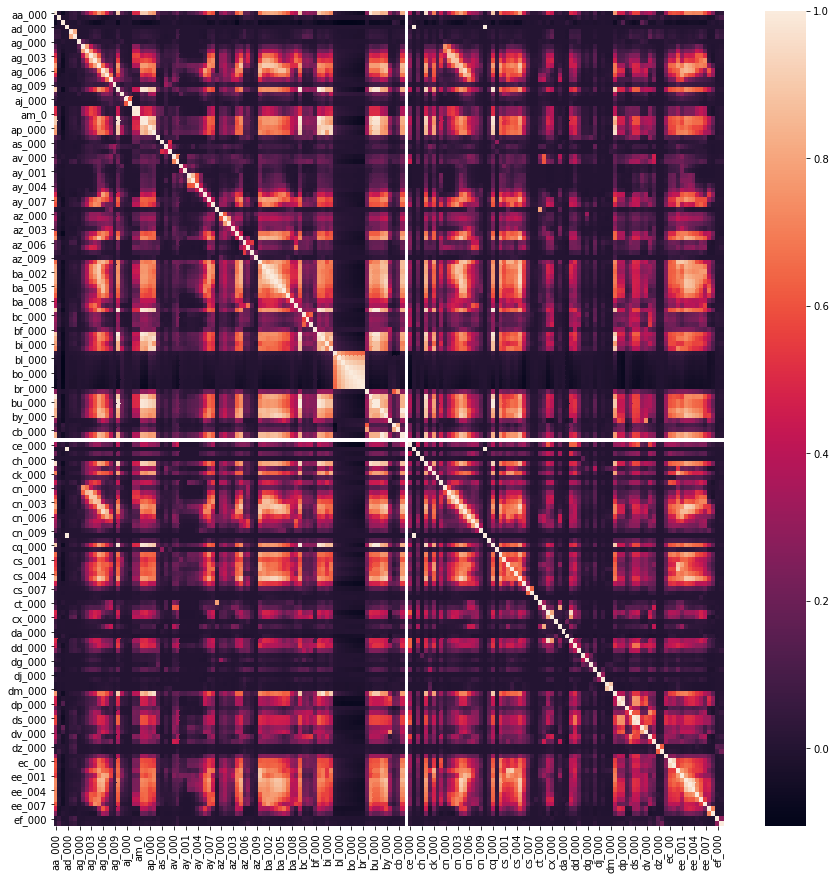

In [48]:
# plotting the correlation matrix as heatmap
plt.subplots(figsize=(15,15))
sns.heatmap(corr)

In [49]:
N = math.floor(math.sqrt(170))
# sorting by standard deviation 

CV = CV.sort_values(by=['CV'], ascending = False)
CV_selected = CV.iloc[:N,0]

print (CV_selected) # N features with highest CV

cf_000    244.885476
co_000    244.505347
ad_000    244.319936
cs_009    237.928571
dh_000    123.215070
dj_000    117.493246
ag_000     92.916981
as_000     87.331772
ay_009     84.733028
ak_000     80.424305
az_009     77.837896
ch_000     77.453212
au_000     68.882177
Name: CV, dtype: float64


In [50]:
lst = list(CV_selected.index)  # selected features' names

# making a data frame with selected features
sel_f =  None
for i in lst:
    sel_f = pd.concat([sel_f, train_X.loc[:,i]], axis=1)

sel_f.insert(N, 'class', train_y)
print(sel_f)

       cf_000  co_000  ad_000  cs_009   dh_000  dj_000  ag_000  as_000  \
0         2.0   220.0   280.0     0.0      0.0     0.0     0.0     0.0   
1         2.0     8.0   128.0     0.0      0.0     0.0     0.0     0.0   
2         0.0     0.0   100.0     0.0      0.0     0.0     0.0     0.0   
3         2.0     2.0    66.0     0.0      0.0     0.0     0.0     0.0   
4         0.0   202.0   458.0     0.0      0.0     0.0     0.0     0.0   
5         2.0     2.0   218.0     0.0      0.0     0.0     0.0     0.0   
6         2.0     8.0   128.0     0.0      0.0     0.0     0.0     0.0   
7         2.0     6.0   116.0     0.0      0.0     0.0     0.0     0.0   
8         2.0     8.0   128.0     0.0      0.0     0.0     0.0     0.0   
9         2.0     8.0   128.0     0.0  55760.0     0.0     0.0     0.0   
10        0.0    48.0   170.0     0.0      0.0     0.0     0.0     0.0   
11        0.0    56.0   454.0     0.0      0.0     0.0     0.0     0.0   
12        0.0    30.0    26.0     0.0 

C:\Users\Myunghee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Myunghee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Myunghee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Myunghee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


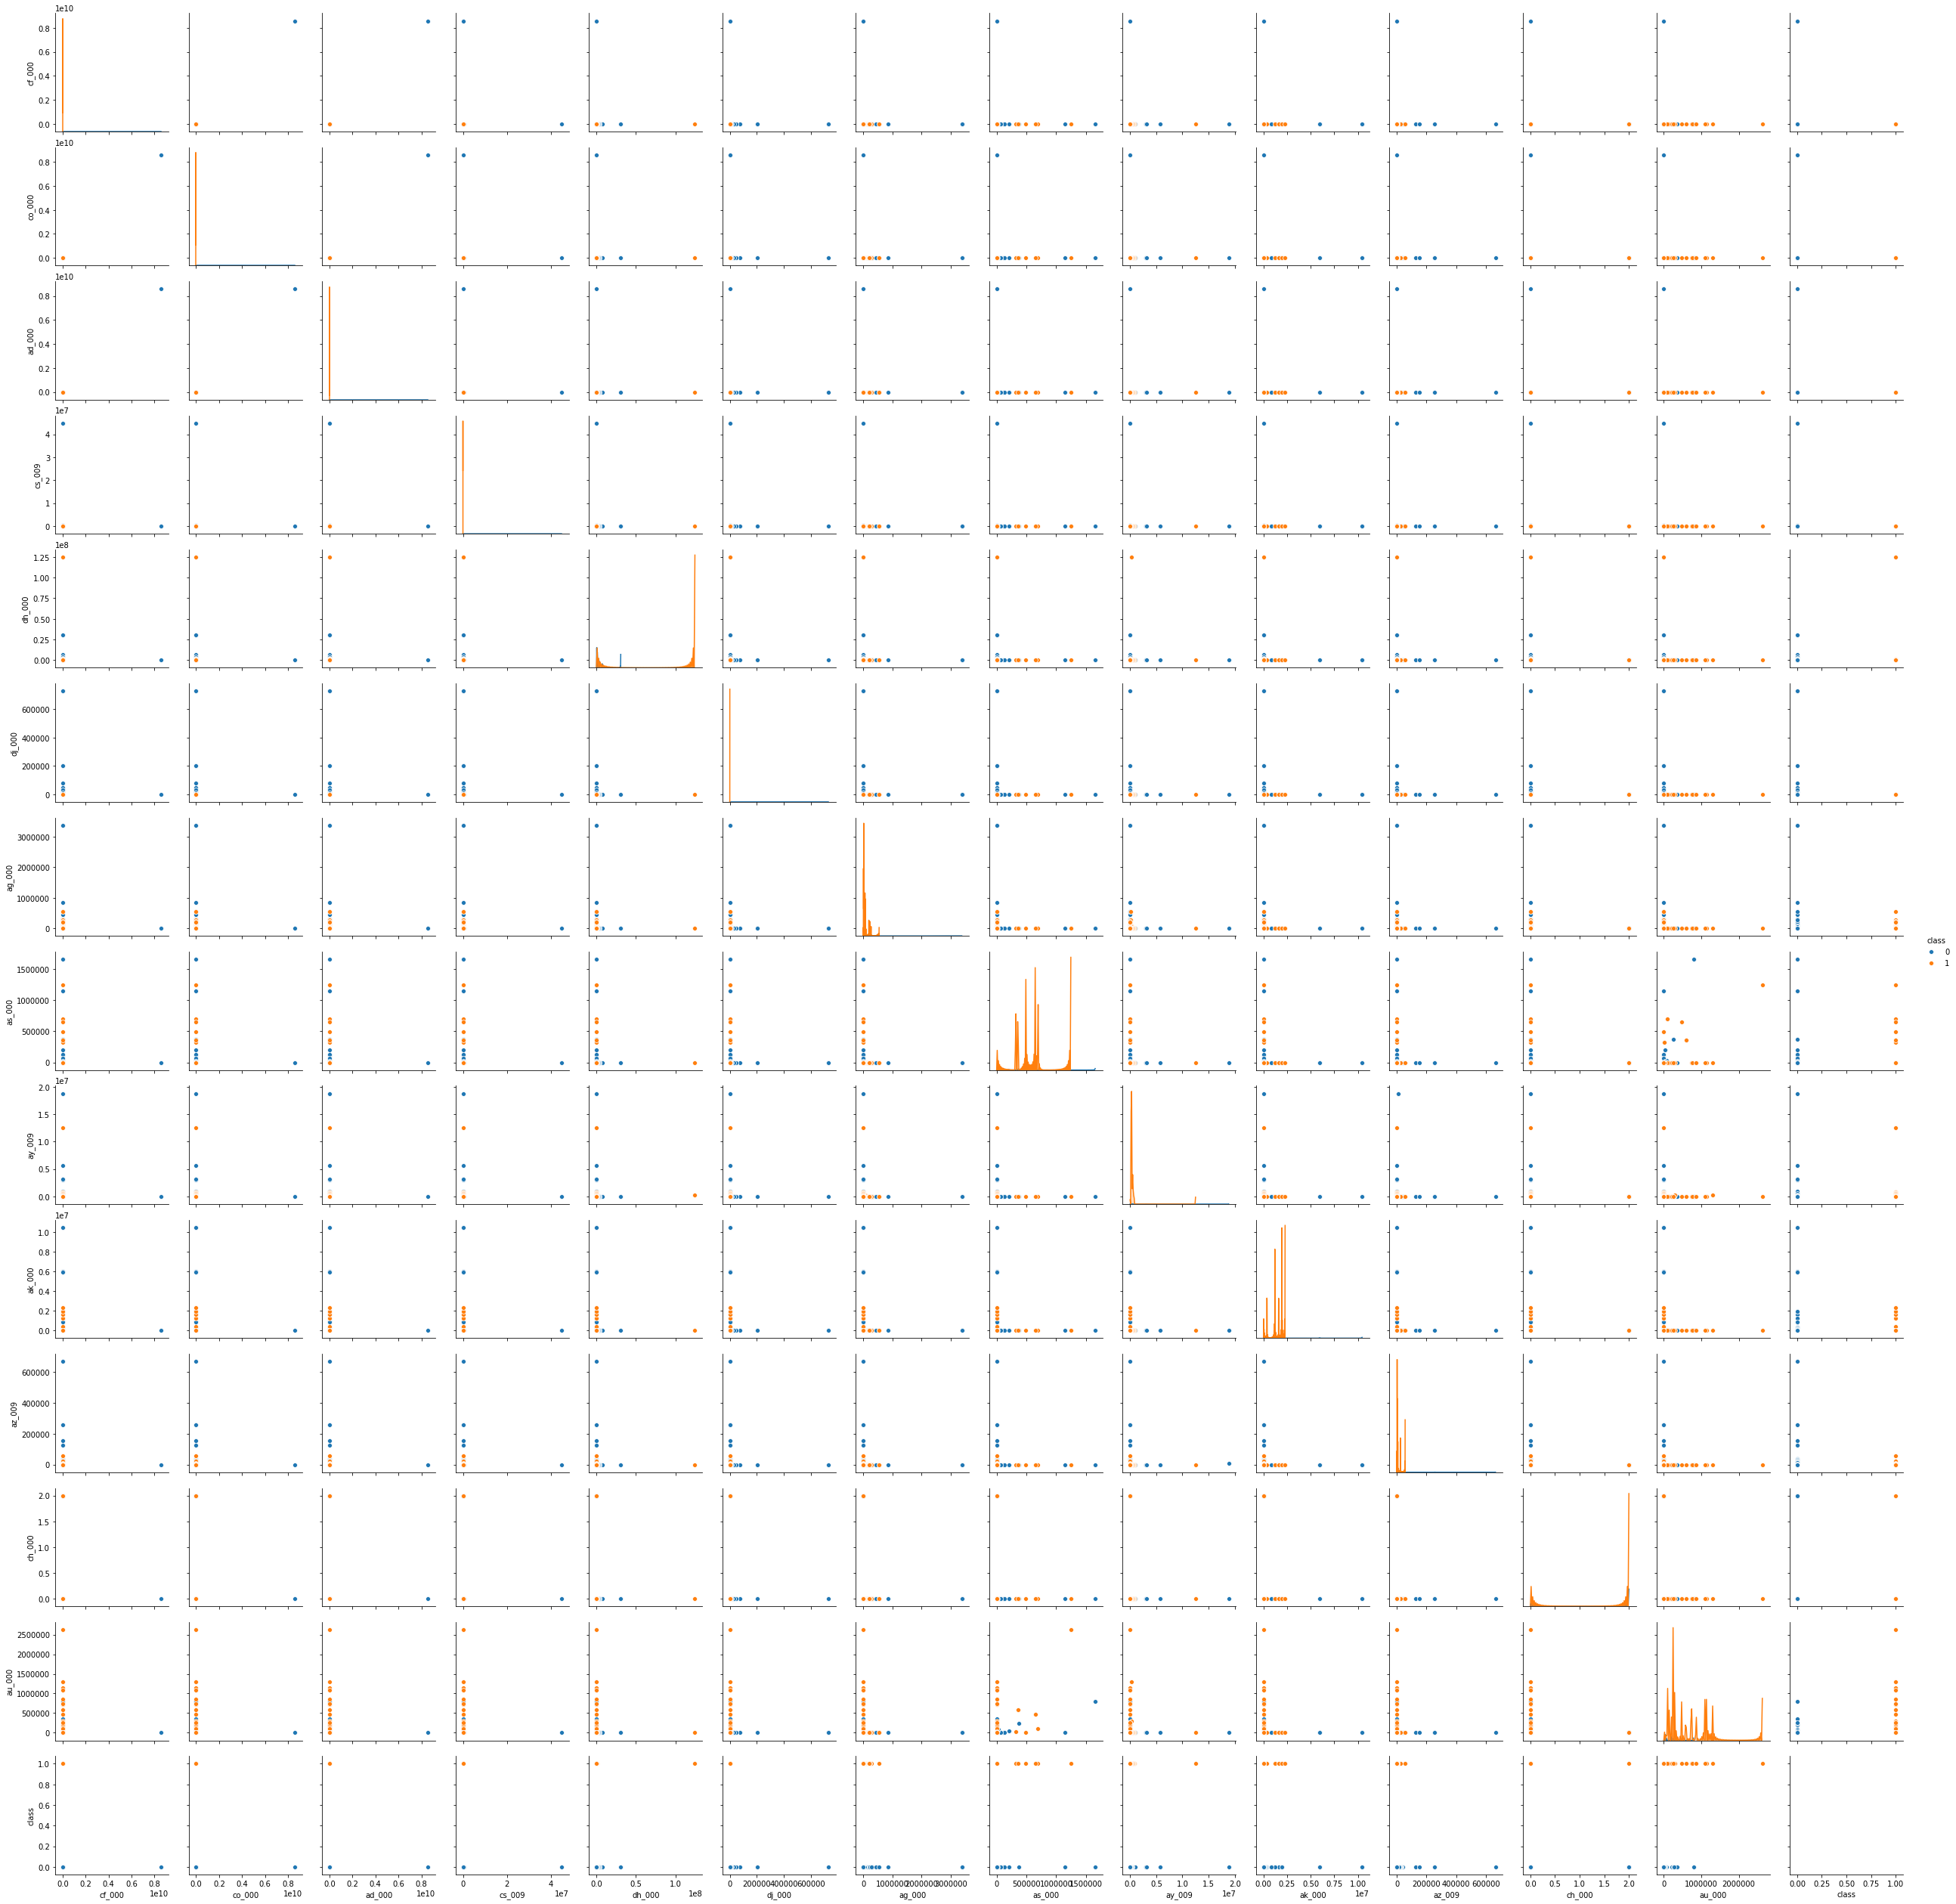

In [51]:
sns.pairplot(sel_f, hue='class')

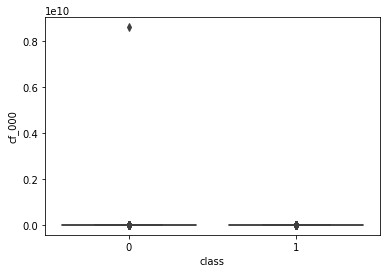

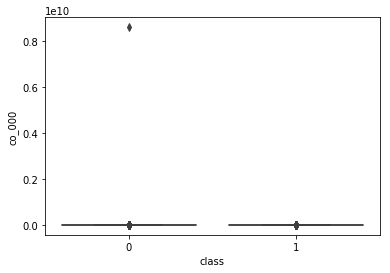

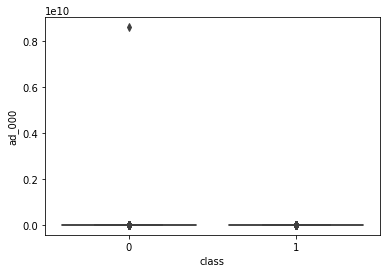

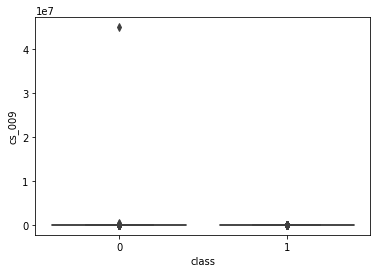

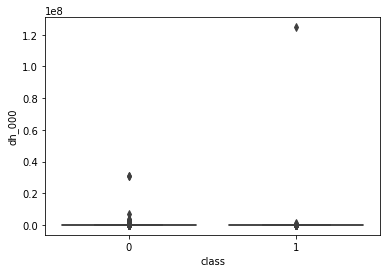

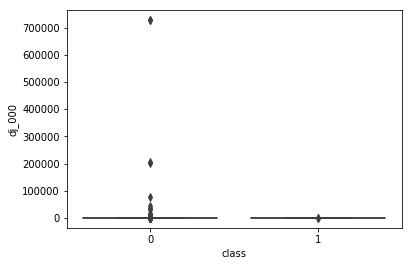

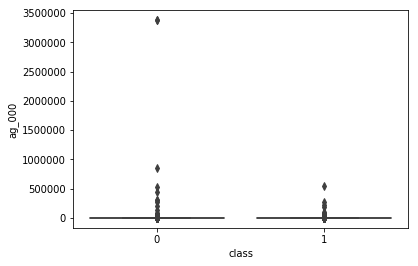

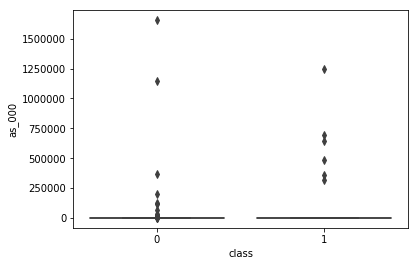

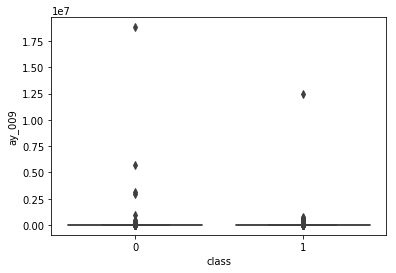

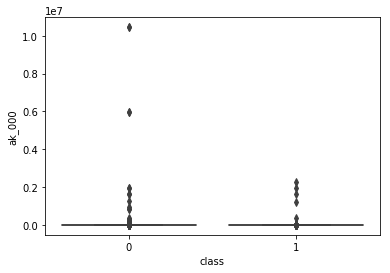

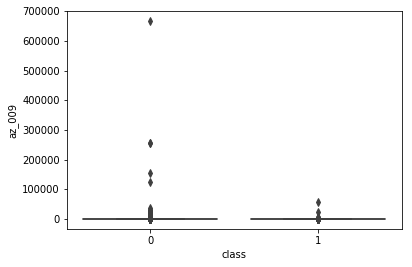

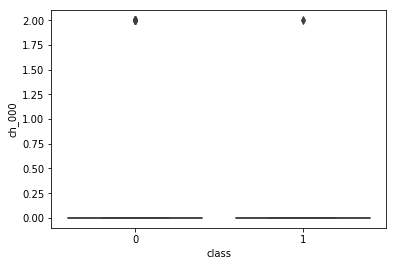

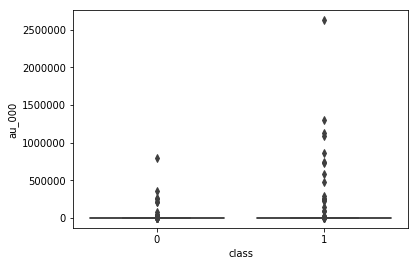

In [52]:
# box plots
for i in range(len(sel_f.columns)-1):
    sns.boxplot(sel_f.iloc[:,-1], sel_f.iloc[:,i])
    plt.show()

In [53]:
N = 0
P = 0

for i in range(len(train_y)):
    if train_y[i] == 0:
        N +=1     
    elif train_y[i] ==1:
        P +=1
print(N, P)

59000 1000


In [54]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators: # of trees, max_features='sqrt': max_features=sqrt(n_features)
clf = RandomForestClassifier(n_estimators=120, max_features='sqrt',\
                             oob_score=True, random_state=0)
clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [55]:
# training set
# comfusion matrix

from sklearn.metrics import confusion_matrix

train_pred = clf.predict(train_X)

cm_train = confusion_matrix(train_y, train_pred)
print(cm_train)

[[59000     0]
 [    0  1000]]


In [56]:
# test set
# comfusion matrix

test_pred = clf.predict(test_X)
cm_test = confusion_matrix(test_y, test_pred)
print(cm_test)

[[15609    16]
 [  102   273]]


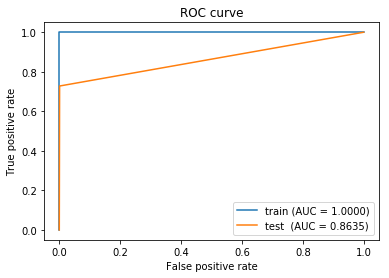

In [57]:
# ROC & AUC for training and test sets
from sklearn import metrics

fpr1, tpr1, thr1 = metrics.roc_curve(train_y, train_pred)
AUC1 = metrics.roc_auc_score(train_y, train_pred)

fpr2, tpr2, thr2 = metrics.roc_curve(test_y, test_pred)
AUC2=metrics.roc_auc_score(test_y, test_pred)

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(["train (AUC = {0:0.4f})".format(AUC1), "test  (AUC = {0:0.4f})".format(AUC2)])
plt.title('ROC curve')

plt.show()

In [58]:
oob_error1 = 1 - clf.oob_score_

from sklearn.metrics import accuracy_score

ac = accuracy_score(test_y, test_pred)
te_err1 =  1-ac

print("OOB_error:", oob_error1)
print("test error:", te_err1)

OOB_error: 0.005900000000000016
test error: 0.00737500000000002


In [59]:
# class_weight='balanced'

clf_imb1 = RandomForestClassifier(n_estimators=120, max_features='sqrt',\
                             oob_score=True, random_state=0, class_weight='balanced')
clf_imb1.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=120, n_jobs=None, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [60]:
# class_weight='balanced'
# training set
# comfusion matrix

train_pred = clf_imb1.predict(train_X)

cm = confusion_matrix(train_y, train_pred)
print(cm)

[[59000     0]
 [    0  1000]]


In [61]:
# class_weight='balanced'
# test set
# comfusion matrix

test_pred = clf_imb1.predict(test_X)
cm_test = confusion_matrix(test_y, test_pred)
print(cm_test)

[[15610    15]
 [  161   214]]


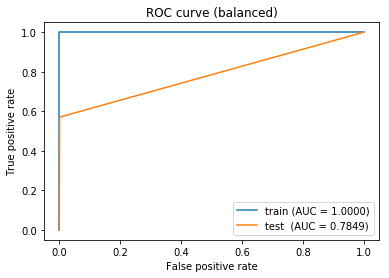

In [62]:
# class_weight='balanced'
# ROC & AUC for training and test sets

fpr1, tpr1, thr1 = metrics.roc_curve(train_y, train_pred)
AUC1 = metrics.roc_auc_score(train_y, train_pred)

fpr2, tpr2, thr2 = metrics.roc_curve(test_y, test_pred)
AUC2=metrics.roc_auc_score(test_y, test_pred)

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(["train (AUC = {0:0.4f})".format(AUC1), "test  (AUC = {0:0.4f})".format(AUC2)])
plt.title('ROC curve (balanced)')

plt.show()

In [63]:
oob_error2 = 1 - clf_imb1.oob_score_

ac = accuracy_score(test_y, test_pred)
te_err2 =  1-ac

print("OOB_error (balanced):", oob_error2)
print("test error (balanced):", te_err2)

OOB_error (balanced): 0.0076666666666667105
test error (balanced): 0.01100000000000001


In [64]:
# class_weight = 'balanced_subsample'
clf_imb2 = RandomForestClassifier(n_estimators=120, max_features='sqrt',\
                             oob_score=True, random_state=0, class_weight='balanced_subsample')
clf_imb2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=120, n_jobs=None, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [65]:
# class_weight = 'balanced_subsample'
# training set
# comfusion matrix

train_pred = clf_imb2.predict(train_X)

cm = confusion_matrix(train_y, train_pred)
print(cm)

[[59000     0]
 [    0  1000]]


In [66]:
# class_weight = 'balanced_subsample'
# test set
# comfusion matrix

test_pred = clf_imb2.predict(test_X)
cm_test = confusion_matrix(test_y, test_pred)
print(cm_test)

[[15607    18]
 [  159   216]]


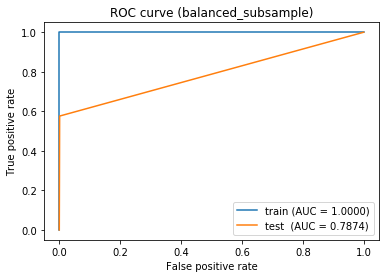

In [67]:
# class_weight = 'balanced_subsample'
# ROC & AUC for training and test sets

fpr1, tpr1, thr1 = metrics.roc_curve(train_y, train_pred)
AUC1 = metrics.roc_auc_score(train_y, train_pred)

fpr2, tpr2, thr2 = metrics.roc_curve(test_y, test_pred)
AUC2=metrics.roc_auc_score(test_y, test_pred)

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(["train (AUC = {0:0.4f})".format(AUC1), "test  (AUC = {0:0.4f})".format(AUC2)])
plt.title('ROC curve (balanced_subsample)')

plt.show()

In [68]:
# class_weight = 'balanced_subsample'
oob_error3 = 1 - clf_imb2.oob_score_

ac = accuracy_score(test_y, test_pred)
te_err3 =  1-ac

print("OOB_error (balanced_subsample):", oob_error2)
print("test error (balanced_subsample):", te_err3)

OOB_error (balanced_subsample): 0.0076666666666667105
test error (balanced_subsample): 0.011062499999999975


In [69]:
# OOB errors and test errors according to Compensation for class imbalance

dic = {"None": [oob_error1, te_err1], "Balanced": [oob_error2, te_err2],\
       "Balanced subsample": [oob_error3, te_err3]}
table = pd.DataFrame(dic, ['OOB error','test error']).T
#table.columns.name='Model'
print(table)

                    OOB error  test error
None                 0.005900    0.007375
Balanced             0.007667    0.011000
Balanced subsample   0.007883    0.011062


In [70]:
train_X.insert(len(train_X.columns),"class", train_y) 
test_X.insert(len(test_X.columns),"class", test_y)

In [71]:
# making arff files of training and test data for Weka
import arff
arff.dump('train.arff', train_X.values, names=train_X.columns)
arff.dump('test.arff', test_X.values, names=test_X.columns)

file1="train.arff"
file2="test.arff"

# amending line "@attribute class real" to "@attribute class {0.0, 1,0}"
lines1= open(file1, 'r').readlines()
lines2= open(file2, 'r').readlines()

for i in range(len(lines1)):
    if lines1[i].startswith('@attribute class'):
        lines1[i]="@attribute class {0.0, 1.0}\n"

for i in range(len(lines2)):
    if lines2[i].startswith('@attribute class'):
        lines2[i]="@attribute class {0.0, 1.0}\n"

open(file1, 'w').writelines(lines1)
open(file2, 'w').writelines(lines2)

In [72]:
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\Myunghee\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\Myunghee\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\Myunghee\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\Myunghee\\Anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\Myunghee\\Anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [73]:
from weka.core.converters import Loader

loader = Loader(classname="weka.core.converters.ArffLoader")
train1 = loader.load_file('train.arff')
train1.class_is_last()

test = loader.load_file('test.arff')
test.class_is_last()

In [74]:
from weka.classifiers import Classifier

cls = Classifier(classname="weka.classifiers.trees.LMT")
cls.build_classifier(train1)

In [75]:
print(cls)

Logistic model tree 
------------------

ag_002 <= 61622
|   ci_000 <= 19607987.52
|   |   dg_000 <= 421044: LM_1:189/756 (57668)
|   |   dg_000 > 421044: LM_2:189/756 (30)
|   ci_000 > 19607987.52
|   |   ay_001 <= 3756
|   |   |   al_000 <= 3201094
|   |   |   |   ay_005 <= 903424
|   |   |   |   |   cj_000 <= 7405134.72: LM_3:189/1323 (1125)
|   |   |   |   |   cj_000 > 7405134.72: LM_4:189/1323 (65)
|   |   |   |   ay_005 > 903424
|   |   |   |   |   ee_003 <= 2822770: LM_5:189/1323 (74)
|   |   |   |   |   ee_003 > 2822770: LM_6:189/1323 (180)
|   |   |   al_000 > 3201094: LM_7:189/945 (53)
|   |   ay_001 > 3756: LM_8:189/756 (81)
ag_002 > 61622
|   ag_002 <= 465034
|   |   ay_006 <= 47524: LM_9:189/756 (194)
|   |   ay_006 > 47524
|   |   |   ai_000 <= 17542
|   |   |   |   aq_000 <= 186508: LM_10:189/1134 (14)
|   |   |   |   aq_000 > 186508
|   |   |   |   |   am_0 <= 4600344
|   |   |   |   |   |   az_009 <= 2: LM_11:189/1512 (193)
|   |   |   |   |   |   az_009 > 2: LM_12:189

In [76]:
from weka.classifiers import Evaluation
from weka.core.classes import Random

# evaluating trainin set
evaluation_tr =Evaluation(train1)
train_pred = evaluation_tr.test_model(cls, train1)

print(evaluation_tr.summary()) 


Correctly Classified Instances       59812               99.6867 %
Incorrectly Classified Instances       188                0.3133 %
Kappa statistic                          0.8978
Mean absolute error                      0.0056
Root mean squared error                  0.0513
Relative absolute error                 16.9488 %
Root relative squared error             40.1005 %
Total Number of Instances            60000     



In [77]:
# evaluating test set
evaluation_te = Evaluation(test)
test_pred = evaluation_te.test_model(cls, test)

print(evaluation_te.summary()) 


Correctly Classified Instances       15859               99.1188 %
Incorrectly Classified Instances       141                0.8812 %
Kappa statistic                          0.7903
Mean absolute error                      0.0108
Root mean squared error                  0.086 
Relative absolute error                 23.633  %
Root relative squared error             56.8298 %
Total Number of Instances            16000     



In [78]:
# confusion matrix for training set
cf_ma = confusion_matrix(train_y, train_pred)
print(cf_ma)

[[58972    28]
 [  160   840]]


In [79]:
# confusion matrix for test set
cf_ma = confusion_matrix(test_y, test_pred)
print(cf_ma)

[[15586    39]
 [  102   273]]


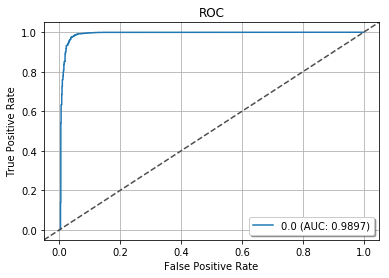

In [80]:
# ROC and AUC for training set
import weka.plot.classifiers as plcls
plcls.plot_roc(evaluation_tr)

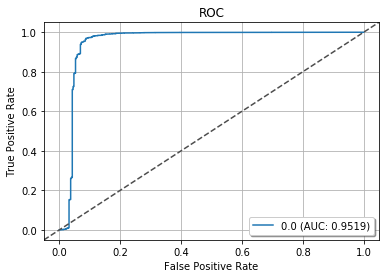

In [81]:
# ROC and AUC for test set
plcls.plot_roc(evaluation_te)

In [82]:
# 5 fold CV
evaluation_cv5 =Evaluation(train1)
evaluation_cv5.crossvalidate_model(cls, train1, 5, Random(1))
print(evaluation_cv5.summary())


Correctly Classified Instances       59515               99.1917 %
Incorrectly Classified Instances       485                0.8083 %
Kappa statistic                          0.7378
Mean absolute error                      0.0105
Root mean squared error                  0.0832
Relative absolute error                 31.9876 %
Root relative squared error             64.9756 %
Total Number of Instances            60000     



In [83]:
# smote
from imblearn.over_sampling import SMOTE

train_X.drop(['class'], axis=1, inplace=True)
X_smote, y_smote = SMOTE().fit_resample(train_X, train_y)
X_smote=pd.DataFrame(X_smote, columns = list(train_X))
print(X_smote)

C:\Users\Myunghee\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


              aa_000    ab_000        ac_000       ad_000  ae_000  af_000  \
0       7.669800e+04  0.000000  2.130706e+09   280.000000     0.0     0.0   
1       3.305800e+04  0.000000  0.000000e+00   128.000000     0.0     0.0   
2       4.104000e+04  0.000000  2.280000e+02   100.000000     0.0     0.0   
3       1.200000e+01  0.000000  7.000000e+01    66.000000     0.0    10.0   
4       6.087400e+04  0.000000  1.368000e+03   458.000000     0.0     0.0   
5       3.831200e+04  0.000000  2.130706e+09   218.000000     0.0     0.0   
6       1.400000e+01  0.000000  6.000000e+00   128.000000     0.0     0.0   
7       1.029600e+05  0.000000  2.130706e+09   116.000000     0.0     0.0   
8       7.869600e+04  0.000000  0.000000e+00   128.000000     0.0     0.0   
9       1.532040e+05  0.000000  1.820000e+02   128.000000     0.0     0.0   
10      3.919600e+04  0.000000  2.040000e+02   170.000000     0.0     0.0   
11      4.591200e+04  0.000000  0.000000e+00   454.000000     0.0     0.0   

In [84]:
# making an arff file

X_smote.insert(len(X_smote.columns),"class", y_smote) 

arff.dump('train_smote.arff', X_smote.values, names=X_smote.columns)

file3="train_smote.arff"

# amending line "@attribute class real" to "@attribute class {0.0, 1,0}"
lines3= open(file3, 'r').readlines()

for i in range(len(lines3)):
    if lines3[i].startswith('@attribute class'):
        lines3[i]="@attribute class {0.0, 1.0}\n"

open(file3, 'w').writelines(lines3)

In [85]:
train2 = loader.load_file('train_smote.arff')
train2.class_is_last()

In [86]:
cls2 = Classifier(classname="weka.classifiers.trees.LMT")
cls2.build_classifier(train2)

In [87]:
print(cls2)

Logistic model tree 
------------------

ck_000 <= 1475223.36: LM_1:197/394 (58272)
ck_000 > 1475223.36: LM_2:197/394 (59728)

Number of Leaves  : 	2

Size of the Tree : 	3

LM_1:
Class 0.0 :
2.31 + 
[aa_000] * -0 +
[ab_000] * 0.08 +
[ae_000] * 0    +
[af_000] * 0    +
[ag_001] * 0    +
[ag_002] * -0 +
[ag_008] * 0    +
[ai_000] * -0 +
[ar_000] * -0.01 +
[at_000] * -0 +
[au_000] * -0 +
[av_000] * -0 +
[ax_000] * 0    +
[ay_002] * -0 +
[ay_004] * -0 +
[ay_009] * -0 +
[az_001] * -0 +
[az_008] * 0    +
[bc_000] * -0 +
[bd_000] * -0 +
[bf_000] * 0    +
[bs_000] * -0 +
[bt_000] * 0    +
[ca_000] * -0 +
[cb_000] * 0    +
[cl_000] * -0 +
[cm_000] * -0 +
[cn_000] * -0 +
[cn_001] * -0 +
[cn_009] * -0 +
[cp_000] * 0    +
[cs_000] * 0    +
[ct_000] * 0    +
[cu_000] * 0    +
[db_000] * 0.01 +
[dd_000] * -0 +
[de_000] * -0 +
[dg_000] * -0 +
[do_000] * -0 +
[dt_000] * -0 +
[dy_000] * 0    +
[dz_000] * -0 +
[ea_000] * 0    +
[ec_00] * 0    +
[ed_000] * -0 +
[ee_009] * -0

Class 1.0 :
-2.31 + 
[aa_00

In [88]:
# evaluating trainin set
evaluation_tr2 =Evaluation(train2)
train_pred2 = evaluation_tr2.test_model(cls2, train2)

print(evaluation_tr2.summary()) 


Correctly Classified Instances      114730               97.2288 %
Incorrectly Classified Instances      3270                2.7712 %
Kappa statistic                          0.9446
Mean absolute error                      0.0497
Root mean squared error                  0.1503
Relative absolute error                  9.9458 %
Root relative squared error             30.0649 %
Total Number of Instances           118000     



In [89]:
# evaluating test set
evaluation_te2 = Evaluation(test)
test_pred2 = evaluation_te2.test_model(cls2, test)

print(evaluation_te2.summary()) 


Correctly Classified Instances       15574               97.3375 %
Incorrectly Classified Instances       426                2.6625 %
Kappa statistic                          0.6108
Mean absolute error                      0.0493
Root mean squared error                  0.1465
Relative absolute error                107.6127 %
Root relative squared error             96.8079 %
Total Number of Instances            16000     



In [90]:
# confusion matrix for training set
cf_ma = confusion_matrix(y_smote, train_pred2)
print(cf_ma)

[[57413  1587]
 [ 1683 57317]]


In [91]:
# confusion matrix for test set
cf_ma = confusion_matrix(test_y, test_pred2)
print(cf_ma)

[[15222   403]
 [   23   352]]


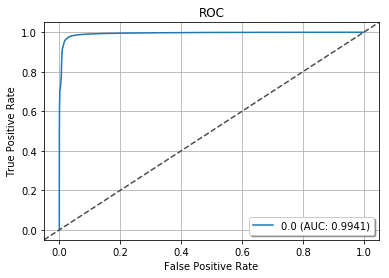

In [92]:
# ROC and AUC for training set

plcls.plot_roc(evaluation_tr2)

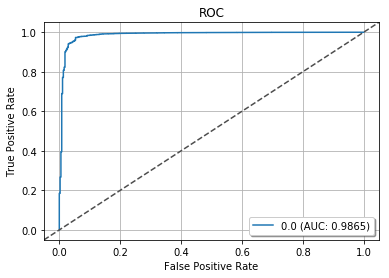

In [93]:
# ROC and AUC for test set

plcls.plot_roc(evaluation_te2)

In [94]:
# 5 fold CV
evaluation2_cv5 =Evaluation(train2)
evaluation2_cv5.crossvalidate_model(cls2, train2, 5, Random(1))
print(evaluation2_cv5.summary())


Correctly Classified Instances      115039               97.4907 %
Incorrectly Classified Instances      2961                2.5093 %
Kappa statistic                          0.9498
Mean absolute error                      0.0435
Root mean squared error                  0.1429
Relative absolute error                  8.7099 %
Root relative squared error             28.5701 %
Total Number of Instances           118000     



In [95]:
jvm.stop()

In [99]:
estimates = [0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7, 0.75]

# the majority vote
count_R = 0  # counting # of estimate > 0.5
count_G = 0  # counting # of estimate <= 0.5
for estimate in estimates:
    if estimate > 0.5:
        count_R +=1
    else:
        count_G +=1

if count_R > count_G:
    print("class by the majority vote: Red")
else:
    print("class by the majority vote: Green")    

# the average probability
ave = sum(estimates)/len(estimates)

if ave > 0.5:
    print("class by the majority vote: Red")
else:
    print("class by the majority vote: Green")

class by the majority vote: Red
class by the majority vote: Green


In [100]:
dic = dict ()
dic[1] = 3, 4, 'Red'
dic[2] = 2, 2, 'Red'
dic[3] = 4, 4, 'Red'
dic[4] = 1, 4, 'Red'
dic[5] = 2, 1, 'Blue'
dic[6] = 4, 3, 'Blue'
dic[7] = 4, 1, 'Blue'

table = pd.DataFrame(dic, index=["X1","X2", "Y"],\
                     columns=[1,2,3,4,5,6,7]).T
table.columns.name='Obs.'

In [101]:
table

Obs.,X1,X2,Y
1,3,4,Red
2,2,2,Red
3,4,4,Red
4,1,4,Red
5,2,1,Blue
6,4,3,Blue
7,4,1,Blue


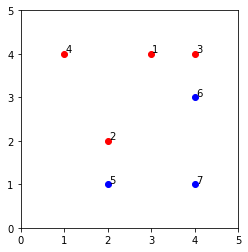

In [102]:
# (a) Sketch the observations.
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.gca().set_aspect('equal', adjustable='box')

labels =  table.index
for i, label in enumerate(labels):
    x = table.iloc[i,0]
    y = table.iloc[i,1]
    plt.scatter(x, y, c=table.iloc[i,2])
    plt.text(x+0.03, y+0.03, label, fontsize=10)

plt.show()

In [103]:
# equation: b0+b1*X1+b2*X2=0

m = (3.5-1.5)/(4-2)  # slope
# equation: X2-1.5 = m(X1-2) -> 2m-1.5 -mX1+X2=0
b0 = 2*m-1.5 
b1 = -m
b2 = 1
print(b0, b1, b2 )

0.5 -1.0 1


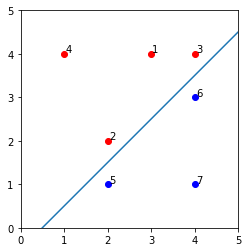

In [104]:
# (b) Sketch the optimal separating hyperplane
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.gca().set_aspect('equal', adjustable='box')

for i, label in enumerate(labels):
    x = table.iloc[i,0]
    y = table.iloc[i,1]
    plt.scatter(x, y, c=table.iloc[i,2])
    plt.text(x+0.03, y+0.03, label, fontsize=10)

xx = np.linspace(0, 5)
yy = xx - b0 

plt.plot(xx, yy)
plt.show()

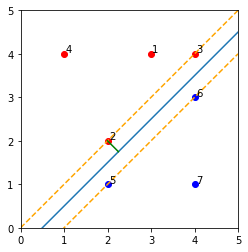

margin: 0.3535533905932738


In [106]:
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.gca().set_aspect('equal', adjustable='box')

for i, label in enumerate(labels):
    x = table.iloc[i,0]
    y = table.iloc[i,1]
    plt.scatter(x, y, c=table.iloc[i,2])
    plt.text(x+0.03, y+0.03, label, fontsize=10)

xx = np.linspace(0, 5)
yy = xx - b0 
yy1 = xx
yy2 = xx - 1
plt.plot(xx, yy1, linestyle = '--', color = 'orange') 
plt.plot(xx, yy)
plt.plot(xx, yy2, linestyle = '--', color = 'orange')

# margin: line (2, 2), (2.25, 1.75)
plt.plot([2, 2.25], [2, 1.75], color='green')
d = math.sqrt(2*(0.25)**2)

plt.show()
print("margin:", d)

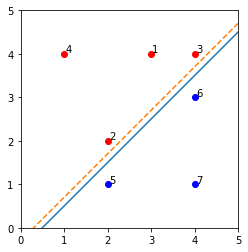

In [107]:
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.gca().set_aspect('equal', adjustable='box')

for i, label in enumerate(labels):
    x = table.iloc[i,0]
    y = table.iloc[i,1]
    plt.scatter(x, y, c=table.iloc[i,2])
    plt.text(x+0.03, y+0.03, label, fontsize=10)

xx = np.linspace(0, 5)
yy = xx - 0.5 
yy1= xx - 0.3
plt.plot(xx, yy)
plt.plot(xx, yy1, linestyle = '--')
plt.show()

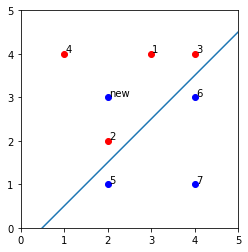

In [108]:
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.gca().set_aspect('equal', adjustable='box')

for i, label in enumerate(labels):
    x = table.iloc[i,0]
    y = table.iloc[i,1]
    plt.scatter(x, y, c=table.iloc[i,2])
    plt.text(x+0.03, y+0.03, label, fontsize=10)

xx = np.linspace(0, 5)

plt.plot(xx, yy)
plt.scatter(2, 3, c = 'blue')
plt.text(2.03, 3.03, 'new', fontsize=10)
plt.show()